# Projeção de follow up de participantes
### com esse mapeamento podemos fazer o planejamento de volumento de atendimentos 
### para dimencionamento de equipe e infraestrutura

In [1]:
#importação de bibliotecas
# não esqueça de instalar os pacotes antes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
import random
import math
import pyreadstat
import json

ModuleNotFoundError: No module named 'pyreadstat'

# Calculando o calendario dos participantes Projeto XYZ

In [13]:
dias_totais = 0
incluidos = 0
participantes_do_dia = 0
calendario = []
recruitment_weeks = [1,2,3]
#recruitment_weeks = 1
semana = [0,1,2,3,4,5,6]
dias_uteis = [1,2,3,4,5]
participantes_totais = 200
recruitment_days = 0
first_day = date(2021, 5, 24)
first_day_2 = date(2021, 8, 24)

nomes_de_visitas = ['screening', 'V1', 'D7_1', 'V2', 'D7_2', 'V3', 'D7_3', 'M1', 'M6', 'M12', 'M24']


def checa_dia_util(data):
    if data.isoweekday() in [1,2,3,4,5]:
        return True
    else:
        return False
def pula_weekend(data):
    if 6:
        return 2
    else:
        return 1


def calculo_visitas_oficiais_COVAXX_3ceira(dias_totais, first_day, count, momento):
  
    screening_day = dias_totais
    
    #dias de follow-up
    vacinacao_1       = random.choice(range(3,8))
    followup_D7       = random.choice(range(6,9))
    vacinacao_2       = random.choice(range(27,32))
    followup_D7_2     = random.choice(range(6,9))
    vacinacao_3       = random.choice(range(27,32))
    followup_D7_3     = random.choice(range(6,9))
    mes_1             = random.choice(range(28,36))
    mes_6             = random.choice(range(175,190))
    mes_12            = random.choice(range(350,379))
    mes_24            = random.choice(range(714,743))
    
    #contatos telefonicos
    c_d14_1           = 14
    c_d14_2           = 14
    c_d14_3           = 14
    c_m2              = 60
    c_m4              = 30*4
    c_m8              = 30*8
    c_m10             = 30*10
    c_m14             = 30*14
    c_m17             = 30*17
    c_m20             = 30*20
    c_m23             = 30*23
    
        
    
    #datas de visitas
    screening_date    = first_day + timedelta(days=screening_day)
    v1_date           = screening_date + timedelta(days=vacinacao_1)
    fup_d7_date       = v1_date + timedelta(days=followup_D7)
    v2_date           = v1_date + timedelta(days=vacinacao_2)
    fup_d7_2date      = v2_date + timedelta(days=followup_D7_2)
    v3_date           = v2_date + timedelta(days=vacinacao_3)
    fup_d7_3date      = v3_date + timedelta(days=followup_D7_3)
    m1_date           = v3_date + timedelta(days=mes_1)
    m6_date           = v3_date + timedelta(days=mes_6)
    m12_date          = v3_date + timedelta(days=mes_12)
    m24_date          = v3_date + timedelta(days=mes_24)
    
    #data dos contatos
    c_d14_1_date      = v1_date + timedelta(days=c_d14_1)
    c_d14_2_date      = v2_date + timedelta(days=c_d14_2)
    c_d14_3_date      = v3_date + timedelta(days=c_d14_3)
    c_m2_date         = v3_date + timedelta(days=c_m2)
    c_m4_date         = v3_date + timedelta(days=c_m4)
    c_m8_date         = v3_date + timedelta(days=c_m8)
    c_m10_date        = v3_date + timedelta(days=c_m10)
    c_m14_date        = v3_date + timedelta(days=c_m14)
    c_m17_date        = v3_date + timedelta(days=c_m17)
    c_m20_date        = v3_date + timedelta(days=c_m20)
    c_m23_date        = v3_date + timedelta(days=c_m23)
    
        
    calendario_participante = [ 
        [screening_day, screening_date, 'Screening', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [vacinacao_1, v1_date, 'V1', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [followup_D7, fup_d7_date, 'Fup_D7_V1', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [vacinacao_2, v2_date, 'V2', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [followup_D7_2,fup_d7_2date,'Fup_D7_V2', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [vacinacao_3,v3_date, 'V3', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [followup_D7_3,fup_d7_3date,'Fup_D7_V3', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [mes_1, m1_date, 'Mes_1', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [mes_6, m6_date, 'Mes_6', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [mes_12, m12_date, 'Mes_12', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        [mes_24, m24_date, 'Mes_24', str(dias_totais) + '__' + str(count), momento, 'Presencial'],
        
        [c_d14_1, c_d14_1_date, 'Contato_D14_1', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_d14_2, c_d14_2_date, 'Contato_D14_2', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_d14_3, c_d14_3_date, 'Contato_D14_3', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m2, c_m2_date, 'Contato_M2', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m4, c_m4_date, 'Contato_M4', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m8, c_m8_date, 'Contato_M8', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m10, c_m10_date, 'Contato_M10', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m14, c_m14_date, 'Contato_M14', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m17, c_m17_date, 'Contato_M17', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m20, c_m20_date, 'Contato_M20', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
        [c_m23, c_m23_date, 'Contato_M23', str(dias_totais) + '__' + str(count), momento, 'Telefone'],
    ]
  
    return calendario_participante
    

    
    
#descomentar a proxima linha para calcular inclusão baseada em quantidade fixa de participantes   
#while incluidos < participantes_totais:
#inclusão competitiva baseada em tempo


#############################  FASE 1 DE RECRUTAMENTO  #################################

#loop1 para recrutamento de 25 pacientes de fase de segurança
for dias in semana:
    while incluidos < 25:
        participantes_do_dia = 5
        #participantes_do_dia = random.choice(range(0,11))
        incluidos += participantes_do_dia
        dias_totais += 1
        dia_de_screening = first_day + timedelta(days=dias_totais)
        if checa_dia_util(dia_de_screening) == False:
            dias_totais += pula_weekend(dia_de_screening)
            dia_de_screening = first_day + timedelta(days=dias_totais)
        for count in range(0, participantes_do_dia + 1):
            calendario_participante = calculo_visitas_oficiais_projetoXYZ(dias_totais, first_day, count, 1)
            calendario.append(calendario_participante)
        
        
#############################  FASE 2 DE RECRUTAMENTO  #################################

#loop2 para recrutamento normal        
for weeks in recruitment_weeks:
    for dias in semana:
        if incluidos < participantes_totais:
            #participantes_do_dia = 13
            participantes_do_dia = random.choice(range(0,13)) #limite de inclusão por dia de 12 participantes
            incluidos += participantes_do_dia
            dias_totais += 1
            dia_de_screening = first_day_2 + timedelta(days=dias_totais)
            if checa_dia_util(dia_de_screening) == False:
                dias_totais += pula_weekend(dia_de_screening)
                dia_de_screening = first_day + timedelta(days=dias_totais)
            for count in range(0, participantes_do_dia + 1):
                calendario_participante = calculo_visitas_oficiais_projetoXYZ(dias_totais, first_day_2, count, 2)
                calendario.append(calendario_participante)

        else:
            break       
        
#construção de lista com dos calendarios calculados
novo_cal = []
for ponto in calendario:
    for outro_ponto in ponto:
        novo_cal.append(outro_ponto)
        
#criando um dataframe dos calendários
df_proj = pd.DataFrame(novo_cal, columns=["General_day_count", "Visit_date", "Visit_name", "PID", "Momento", "Tipo"]) 

#exportar dados para planilha excel
df_proj.to_excel("calendario_xyz.xlsx")

## Contando quantos contatos telefonicos serão realizados

In [25]:
df_to_contact = pd.read_excel('calendario_xyz.xlsx', engine='openpyxl')
df_to_contact = df_to_contact[df_to_contact['Tipo'] == 'Telefone']
df_to_contact.groupby([df_to_contact['Visit_date'],df_to_contact['Visit_name']]).sum().to_excel("calendario_telefones_xyz.xlsx")

## Protagem de gráfico com a visitas calculadas

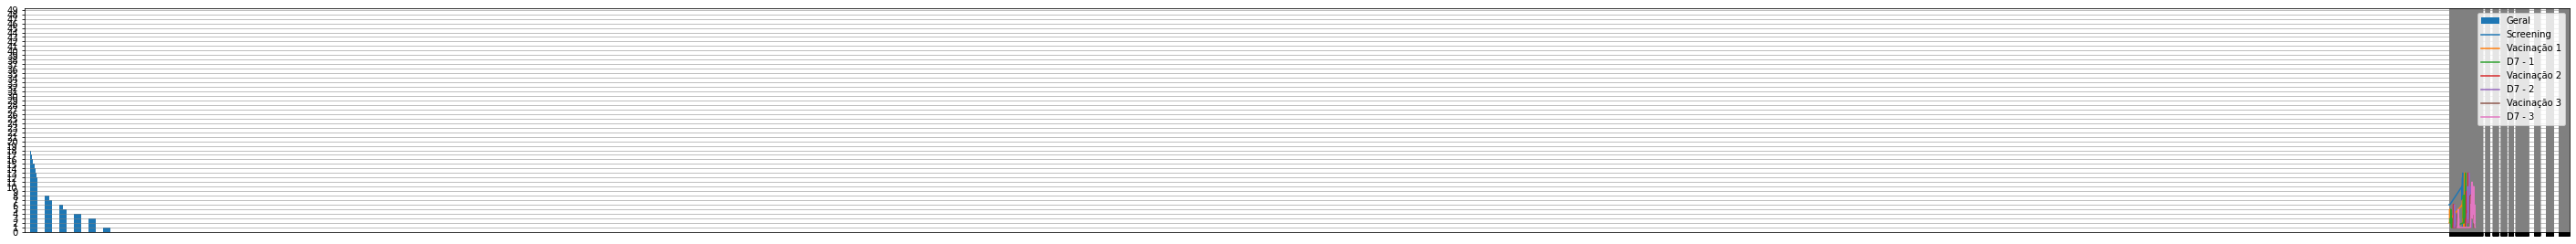

In [5]:
#carregar dados da planilha salva

df_loaded = pd.read_excel('calendario_xyz.xlsx', engine='openpyxl')

plt.yticks(np.arange(0,200,1))

#montando o grafico de acompanhamento
df_loaded['Visit_date'].value_counts().plot(figsize=(20,300), label='Geral', legend=True)

#separando as linhas de visitas no calendário
screening = df_loaded[df_loaded['Visit_name'] == 'Screening']
v1 = df_loaded[df_loaded['Visit_name'] == 'V1']
D71 = df_loaded[df_loaded['Visit_name'] == 'Fup_D7_V1']
v2 = df_loaded[df_loaded['Visit_name'] == 'V2']
D72 = df_loaded[df_loaded['Visit_name'] == 'Fup_D7_V2']
v3 = df_loaded[df_loaded['Visit_name'] == 'V3']
D73 = df_loaded[df_loaded['Visit_name'] == 'Fup_D7_V3']

#plotando linhas individuais de acompanhamento
screening['Visit_date'].value_counts().plot(figsize=(40,5), legend=True, grid=True, label='Screening')
v1['Visit_date'].value_counts().plot(legend=True, label='Vacinação 1')
D71['Visit_date'].value_counts().plot(legend=True, label='D7 - 1')
v2['Visit_date'].value_counts().plot(legend=True, figsize=(50,5), label='Vacinação 2')
D72['Visit_date'].value_counts().plot(legend=True, label='D7 - 2')
v3['Visit_date'].value_counts().plot(legend=True, figsize=(50,5), label='Vacinação 3')
D73['Visit_date'].value_counts().plot(label='D7 - 3', legend=True)

plt.grid(color='gray', linestyle='-', linewidth=0.5)
#rotacionando as legendas
plt.xticks(df_loaded['Visit_date'], rotation=90)
#salvando o gráfico em PNG
plt.savefig('periodo critico.png')



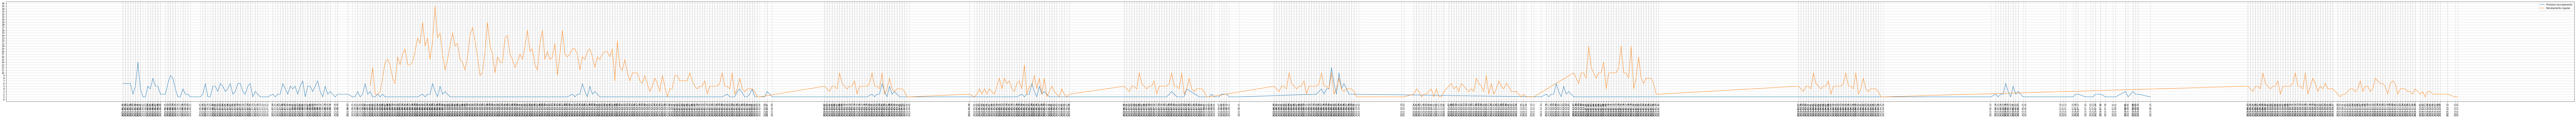

In [7]:
#criação do grafico usando Dataframe original, com o acompanhamento geral dos dois períodos de recrutamento

plt.yticks(np.arange(0,200,1))

df1 = df_proj[df_proj['Momento'] == 1]
df2 = df_proj[df_proj['Momento'] == 2]

df1['Visit_date'].value_counts().plot(figsize=(200,8), label='Primeiro recrutamento', legend=True)
df2['Visit_date'].value_counts().plot(label='Rerutamento regular', legend=True)
plt.grid( linestyle='-', linewidth=0.5)
plt.xticks(df_proj['Visit_date'], rotation=90)

plt.savefig('periodo critico2.png')


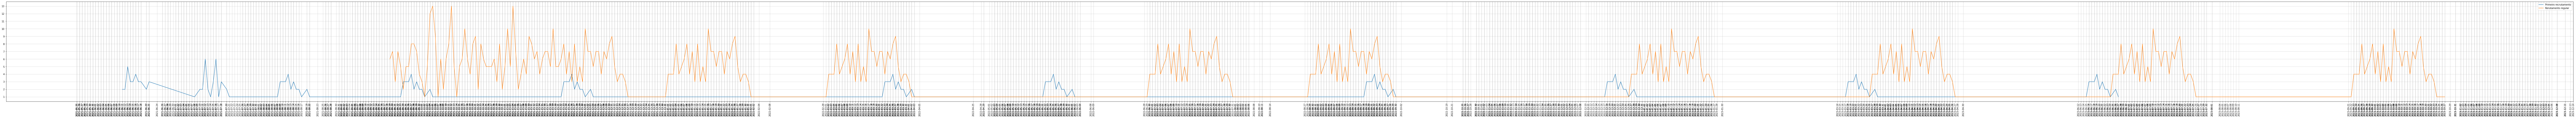

In [24]:
#criação de gŕafico de contatos telefônicos para o projeto XYZ
plt.yticks(np.arange(0,200,1))

df1 = df_proj[(df_proj['Momento'] == 1) & (df_proj['Tipo'] == 'Telefone')]
df2 = df_proj[(df_proj['Momento'] == 2) & (df_proj['Tipo'] == 'Telefone')]

df1['Visit_date'].value_counts().plot(figsize=(200,8), label='Primeiro recrutamento', legend=True)
df2['Visit_date'].value_counts().plot(label='Rerutamento regular', legend=True)
plt.grid( linestyle='-', linewidth=0.5)
plt.xticks(df_proj['Visit_date'], rotation=90)

plt.savefig('fluxo_de_contatos_telefonicos_covaxx.png')

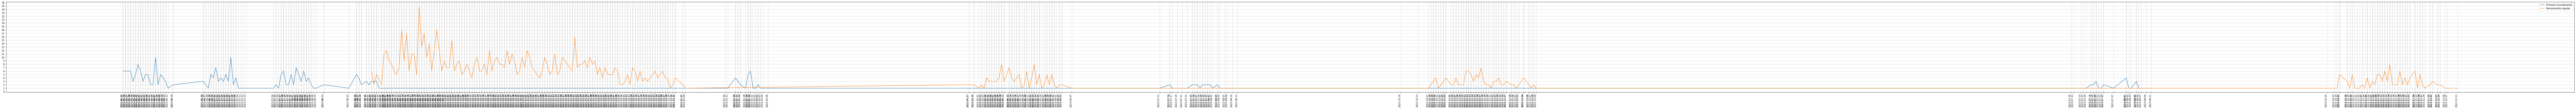

In [26]:

#criação do grafico usando Dataframe carregado do arquivo xlsx

plt.yticks(np.arange(0,200,1))

df1 = df_loaded[df_loaded['Momento'] == 1]
df2 = df_loaded[df_loaded['Momento'] == 2]

df1['Visit_date'].value_counts().plot(figsize=(200,8), label='Primeiro recrutamento', legend=True)
df2['Visit_date'].value_counts().plot(label='Rerutamento regular', legend=True)
plt.grid( linestyle='-', linewidth=0.5)
plt.xticks(df_proj['Visit_date'], rotation=90)

plt.savefig('periodo critico3.png')

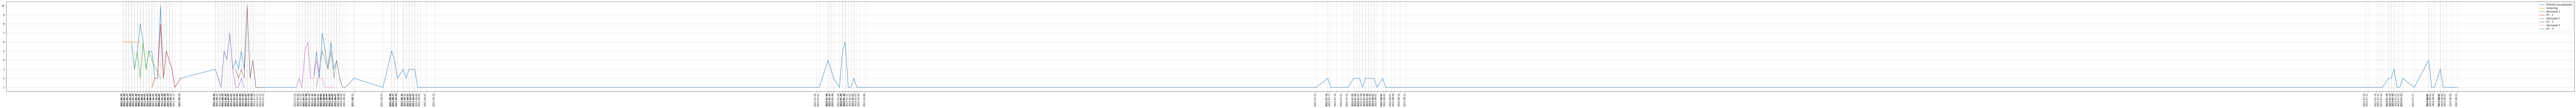

In [23]:
#plot de contagem de visitas por tipo de visita
plt.yticks(np.arange(0,200,1))

df1 = df_loaded[df_loaded['Momento'] == 1]
df2 = df_loaded[df_loaded['Momento'] == 2]



screening = df1[df1['Visit_name'] == 'Screening']
v1 = df1[df1['Visit_name'] == 'V1']
D71 = df1[df1['Visit_name'] == 'Fup_D7_V1']
v2 = df1[df1['Visit_name'] == 'V2']
D72 = df1[df1['Visit_name'] == 'Fup_D7_V2']
v3 = df1[df1['Visit_name'] == 'V3']
D73 = df1[df1['Visit_name'] == 'Fup_D7_V3']


df1['Visit_date'].value_counts().plot(figsize=(200,8), label='Primeiro recrutamento', legend=True)

screening['Visit_date'].value_counts().plot(legend=True, grid=True, label='Screening')
v1['Visit_date'].value_counts().plot(legend=True, label='Vacinação 1')
D71['Visit_date'].value_counts().plot(legend=True, label='D7 - 1')
v2['Visit_date'].value_counts().plot(legend=True, label='Vacinação 2')
D72['Visit_date'].value_counts().plot(legend=True, label='D7 - 2')
v3['Visit_date'].value_counts().plot(legend=True, label='Vacinação 3')
D73['Visit_date'].value_counts().plot(label='D7 - 3', legend=True)

plt.grid( linestyle='-', linewidth=0.5)
plt.xticks(df1['Visit_date'], rotation=90)

plt.savefig('periodo critico344.png')

# Contagem de visitas e agrupamento por: Momento -> Visita -> Data

In [131]:
#carregando dados da planilha
df_loaded = pd.read_excel('calendario_xyz.xlsx', engine='openpyxl')

#agrupando por fase de recrutamento, visita e data prevista de visita
df_grouped = df_loaded.groupby(by=['Momento', 'Visit_name', 'Visit_date'])
#exportando para o excel
df_grouped.size().to_frame().to_excel('recrutamento_xyz_grouped.xlsx')

#agrupamento por momento e visita
df_grouped2 = df_loaded.groupby(by=['Momento', 'Visit_name'])
df_grouped2.size().head(20)
df_grouped2.size().to_frame().to_excel('recrutamento_xyz_grouped_visit.xlsx')


In [67]:
#Contagem de visitas por data
visitas_group = df_proj.groupby('Visit_name', as_index=True)
visitas_group['Visit_date'].value_counts().head(50)

Visit_name  Visit_date
Fup_D7_V1   2021-10-01    10
            2021-09-24     9
            2021-09-18     8
            2021-09-30     8
            2021-10-11     8
            2021-09-14     7
            2021-09-19     7
            2021-09-21     7
            2021-09-28     7
            2021-09-29     7
            2021-06-06     6
            2021-06-07     6
            2021-09-17     6
            2021-10-05     6
            2021-10-09     6
            2021-09-13     5
            2021-09-15     5
            2021-09-20     5
            2021-09-23     5
            2021-09-26     5
            2021-10-02     5
            2021-09-12     4
            2021-09-27     4
            2021-10-04     4
            2021-06-08     3
            2021-06-10     3
            2021-06-11     3
            2021-09-22     3
            2021-10-06     3
            2021-10-07     3
            2021-10-12     3
            2021-06-09     2
            2021-06-12     2
            2021-06-

In [125]:
#verificando a data da ultima visitas de mês 1
mes1 = df_proj[df_proj['Visit_name'] == 'Mes_1']
mes1['Visit_date'].max()

datetime.date(2022, 10, 21)